In [85]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import os

import matplotlib.pyplot as plt

import helper as hp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [275]:
colors = ['royalblue', 'blueviolet', 'lightskyblue', 'grey', 'teal',
          'mediumspringgreen', 'yellow', 'r', 'g', 'b', 'm', 'darksalmon',
          'sienna', 'slateblue', 'plum', 'burlywood', 'olive', 'maroon',
          'dodgerblue', 'gold', 'deepskyblue', 'indianred', 'lightcoral', 'palevioletred']
all_months = range(1, 13)

# Load Data

```python
MARKET_ORDER = 'Net Payment Paid/Received for Market Orders(USD)'
MARKET_LIMIT_ORDER = 'Net Payment Paid/ Received for Marketable Limit Orders(USD)'
NON_MARKET_LIMIT_ORDER = 'Net Payment Paid/ Received for Non- Marketable Limit Orders(USD)'

SP500 = 'sp500_stock'
NSP = 'non_sp500_stock'
OPTIONS = 'options'
```

In [195]:
data_dict = dict()
for f in sorted(os.listdir("606a")):
    month = int(f[:-4])
    tables = hp.read_table(f"606a/{f}")
    data_dict[month] = tables

In [196]:
loader = hp.DataLoader(data_dict)

In [197]:
loader.venue_set

{'Citadel',
 'G1X',
 'Global Execution Brokers',
 'Morgan Stanley',
 'Two Sigma',
 'Virtu',
 'Wolverine'}

# Analysis
## Total Revenue

In [198]:
total_revenue = loader.get_simple_aggregate('sum')
hp.money_format(total_revenue)

'613,502,560.61'

In [199]:
monthly_total = []
for month in all_months:
    v = loader.get_simple_aggregate(sum, month=month)
    monthly_total.append(v)

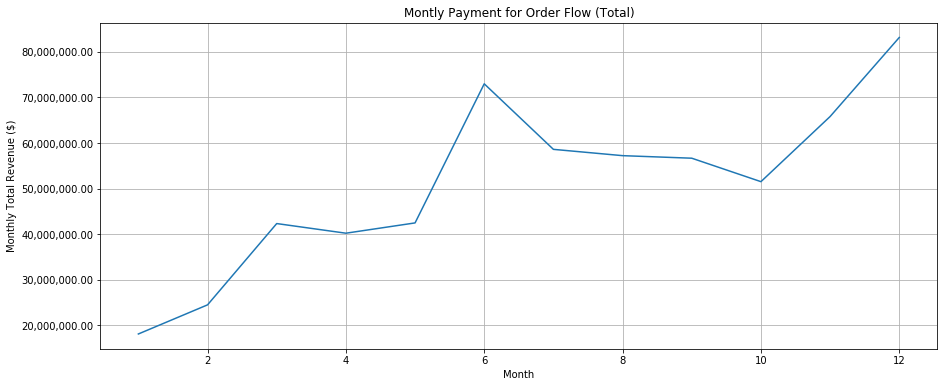

In [202]:
# plt.figure(figsize=(12, 4), dpi=100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
ax.plot(all_months, monthly_total)
ax.set_yticklabels([hp.money_format(i * 1e7) for i in range(1, 9)], minor=False)
plt.xlabel('Month')
plt.ylabel('Monthly Total Revenue ($)')
plt.title('Montly Payment for Order Flow (Total)')
plt.grid()

## Division by Venue

In [203]:
per_venue = []
for venue in sorted(loader.venue_set):
    monthly = []
    for month in all_months:
        v = loader.get_simple_aggregate(sum, month=month, venue=venue)
        monthly.append(v)
    per_venue.append(monthly)

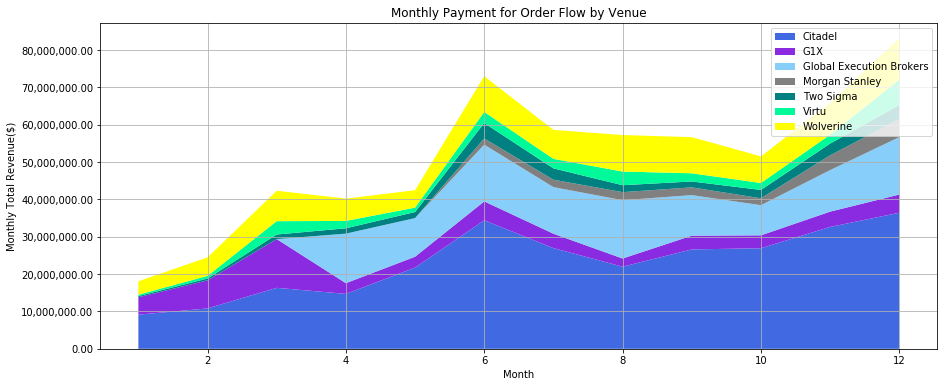

In [210]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plt.stackplot(all_months, *per_venue, labels=sorted(loader.venue_set), colors=colors)
ax.set_yticklabels([hp.money_format(i * 1e7) for i in range(0, 10)], minor=False)
plt.xlabel('Month')
plt.ylabel('Monthly Total Revenue($)')
plt.title('Monthly Payment for Order Flow by Venue')
plt.legend()
plt.grid()

## Venue Totals

In [211]:
venue_names = sorted(loader.venue_set)
per_venue = []
percentage = []
for venue in venue_names:
    v = loader.get_simple_aggregate(sum, venue=venue)
    per_venue.append(v)
    percentage.append(v / total_revenue)

for i, v in enumerate(per_venue):
    print(f'{(venue_names[i]).ljust(25)}: {(hp.money_format(v)).rjust(16)} ({str(round(percentage[i] * 100, 1)).rjust(4)}%)')

Citadel                  :   278,632,785.39 (45.4%)
G1X                      :    58,247,198.75 ( 9.5%)
Global Execution Brokers :   112,261,201.74 (18.3%)
Morgan Stanley           :    18,540,003.16 ( 3.0%)
Two Sigma                :    24,813,379.73 ( 4.0%)
Virtu                    :    30,154,285.53 ( 4.9%)
Wolverine                :    90,853,706.31 (14.8%)


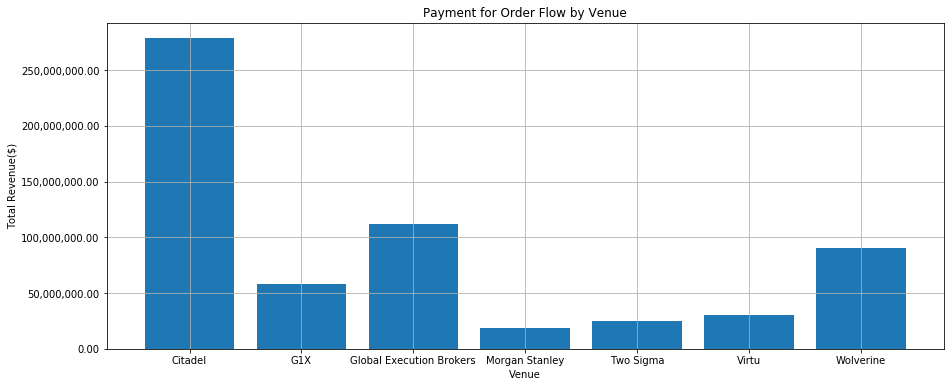

In [214]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plt.bar(venue_names, per_venue)
ax.set_yticklabels([hp.money_format(i * 1e8 / 2)  for i in range(0, 6)], minor=False)
plt.xlabel('Venue')
plt.ylabel('Total Revenue($)')
plt.title('Payment for Order Flow by Venue')
plt.grid()

## Total Revenue from Instrument Category

In [215]:
table_names = sorted(loader.table_set)
per_category = []
for cat in table_names:
    v = loader.get_simple_aggregate(sum, table_type=cat)
    per_category.append(v)
    
for i, v in enumerate(per_category):
    print(f'{(table_names[i]).ljust(16)}: {(hp.money_format(v)).rjust(16)}')

non_sp500_stock :   158,869,283.13
options         :   438,124,077.52
sp500_stock     :    16,509,199.96


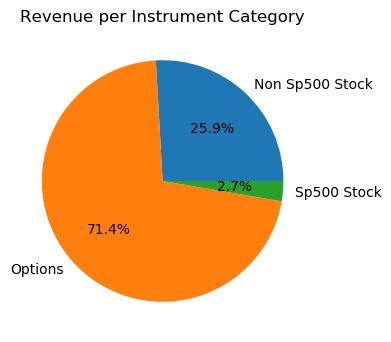

In [216]:
plt.figure(figsize=(12, 4), dpi=100)
plt.pie(per_category, labels=[t.replace('_', ' ').title() for t in table_names], autopct='%1.1f%%')
plt.title("Revenue per Instrument Category")
plt.show()

## Revenue from Instrument Category

In [222]:
per_category = []
for cat in sorted(loader.table_set):
    monthly = []
    for month in all_months:
        v = loader.get_simple_aggregate(sum, table_type=cat, month=month)
        monthly.append(v)
    per_category.append(monthly) 

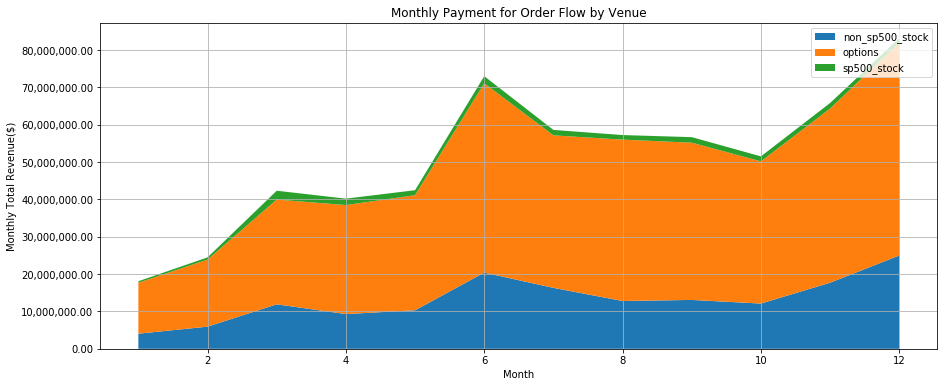

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plt.stackplot(all_months, *per_category, labels=sorted(loader.table_set))
ax.set_yticklabels([hp.money_format(i * 1e7) for i in range(0, 9)], minor=False)
plt.xlabel('Month')
plt.ylabel('Monthly Total Revenue($)')
plt.title('Monthly Payment for Order Flow by Venue')
plt.legend()
plt.grid()

## Revenue from Instrument Category per Venue

In [219]:
per_category = []
for cat in sorted(loader.table_set):
    per_venue = []
    for venue in venue_names:
        v = loader.get_simple_aggregate(sum, table_type=cat, venue=venue)
        per_venue.append(v)
    per_category.append(per_venue) 

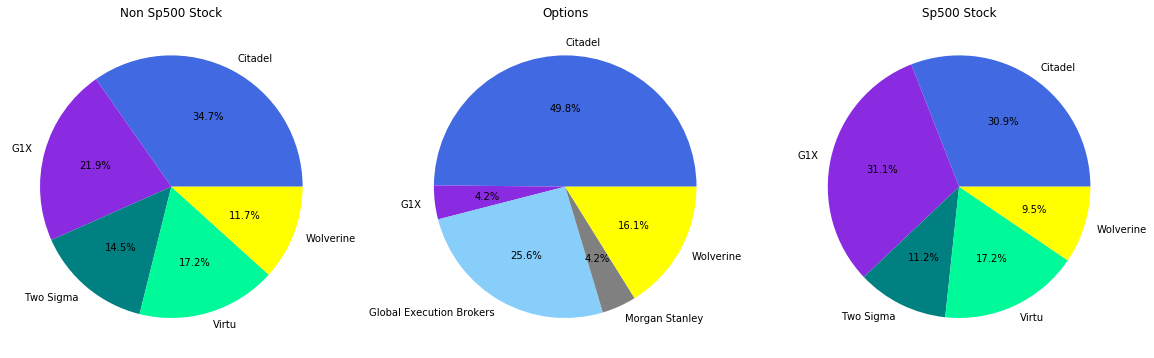

In [220]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i, ax in enumerate(axs):
    shown_values = []
    shown_names = []
    shown_colors = []
    for j, v in enumerate(per_category[i]):
        if v > 0:
            shown_values.append(v)
            shown_names.append(venue_names[j])
            shown_colors.append(colors[j])
    ax.pie(shown_values, labels=shown_names, autopct='%1.1f%%', colors=shown_colors)
    ax.set_title(sorted(loader.table_set)[i].replace('_', ' ').title())

# A Case for Interactive Brokers
Basically a repeat of stuff above :D

In [242]:
data_dict_ib = dict()
for f in sorted(os.listdir("606a_ibkr")):
    month = int(f[:-4])
    tables = hp.read_table(f"606a_ibkr/{f}")
    data_dict_ib[month] = tables

loader_ib = hp.DataLoader(data_dict_ib)
total_revenue_ib = loader_ib.get_simple_aggregate('sum')
hp.money_format(total_revenue_ib)

'17,367,718.00'

In [257]:
# Robinhood here
hp.money_format((loader.get_simple_aggregate('sum', month=[10,11,12])))

'200,483,352.82'

## Division by Venue

CBOE BYX Exchange (BATY)                :        16,674.00 ( 0.1%)
CBOE C2                                 :      -127,165.00 (-0.7%)
CBOE C2 Exchange (C2OX)                 :        61,534.00 ( 0.4%)
CBOE EDGX Exchange (EDGX)               :    -2,622,028.00 (-15.1%)
Cboe BZX Options Exchange (BATS)        :       105,169.00 ( 0.6%)
Cboe EDGX                               :     1,316,996.00 ( 7.6%)
Cboe EDGX Options Exchange (EDGO)       :     3,222,520.00 (18.6%)
Chicago Board Options Exchange (XCBO)   :     3,294,802.00 (19.0%)
Citadel  (CDED)                         :       748,983.00 ( 4.3%)
Exchange (C2OX)                         :             0.00 ( 0.0%)
IBKR ATS (IATS)                         :             0.00 ( 0.0%)
IEX (IEXD)                              :       -91,340.00 (-0.5%)
IEX (IEXG)                              :       -52,876.00 (-0.3%)
MIAX Emerald Exchange (EMLD)            :     1,823,834.00 (10.5%)
NYSE Arca (ARCX)                        :    -1,253,035.00 (-

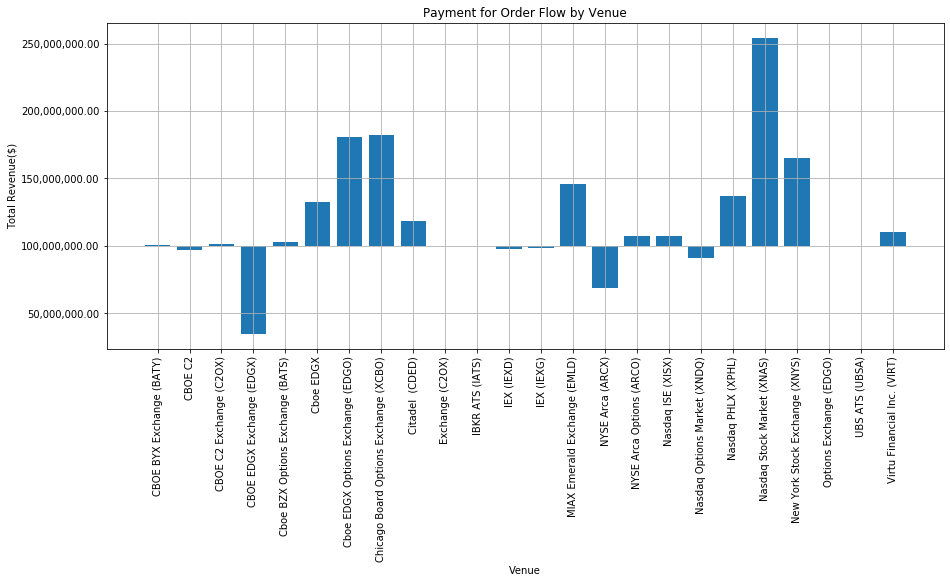

In [252]:
venue_names = sorted(loader_ib.venue_set)
per_venue = []
percentage = []
for venue in venue_names:
    v = loader_ib.get_simple_aggregate(sum, venue=venue)
    per_venue.append(v)
    percentage.append(v / total_revenue_ib)

for i, v in enumerate(per_venue):
    print(f'{(venue_names[i]).ljust(40)}: {(hp.money_format(v)).rjust(16)} ({str(round(percentage[i] * 100, 1)).rjust(4)}%)')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plt.bar(venue_names, per_venue)
ax.set_yticklabels([hp.money_format(i * 1e8 / 2)  for i in range(0, 6)], minor=False)
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Total Revenue($)')
plt.title('Payment for Order Flow by Venue')
plt.grid()

non_sp500_stock :     5,016,701.00
options         :    11,420,045.00
sp500_stock     :       930,972.00


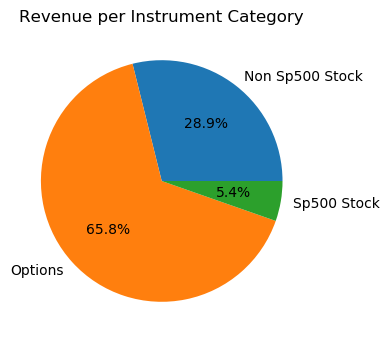

In [251]:
table_names = sorted(loader_ib.table_set)
per_category = []
for cat in table_names:
    v = loader_ib.get_simple_aggregate(sum, table_type=cat)
    per_category.append(v)
    
for i, v in enumerate(per_category):
    print(f'{(table_names[i]).ljust(16)}: {(hp.money_format(v)).rjust(16)}')

plt.figure(figsize=(12, 4), dpi=100)
plt.pie(per_category, labels=[t.replace('_', ' ').title() for t in table_names], autopct='%1.1f%%')
plt.title("Revenue per Instrument Category")
plt.show()

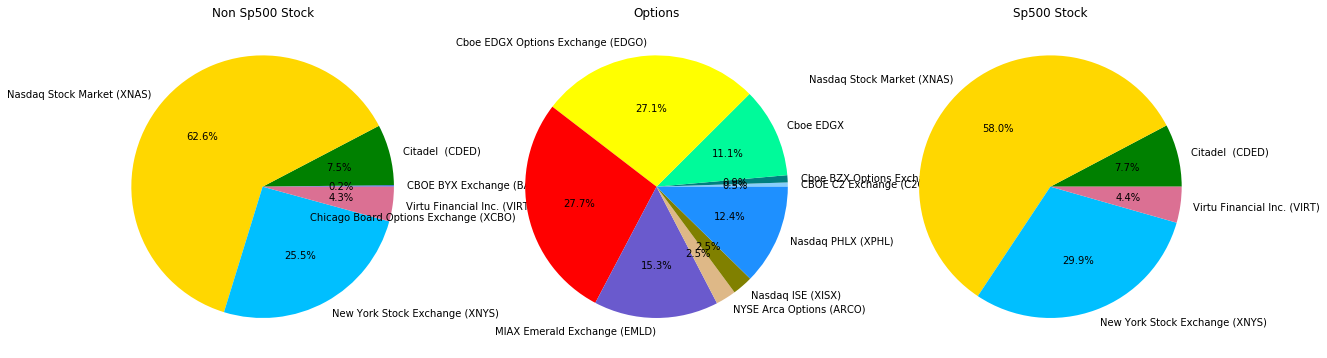

In [277]:
per_category = []
for cat in sorted(loader_ib.table_set):
    per_venue = []
    for venue in venue_names:
        v = loader_ib.get_simple_aggregate(sum, table_type=cat, venue=venue)
        per_venue.append(v)
    per_category.append(per_venue) 
    
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i, ax in enumerate(axs):
    shown_values = []
    shown_names = []
    shown_colors = []
    for j, v in enumerate(per_category[i]):
        if v > 0:
            shown_values.append(v)
            shown_names.append(venue_names[j])
            shown_colors.append(colors[j])
    ax.pie(shown_values, labels=shown_names, autopct='%1.1f%%', colors=shown_colors)
    ax.set_title(sorted(loader.table_set)[i].replace('_', ' ').title())    